### Now that we're done with filtering the basic requirements we can start plotting a bit of distributions

In [1]:
from scripts.patient import Patient, Gender
from scripts.plots import plot_patients_by_status, Status
from scripts.generic_methods import load_dataset

In [2]:
DATASET = load_dataset("../data/filtered/cardio_train.csv", ",")

In [3]:
def male(patient: Patient) -> Status:
    """Check if a patient is valid."""
    return Status.VALID if patient.gender == Gender.MALE else Status.INVALID
def overweight(patient: Patient) -> Status:
    """Check if a patient is overweight."""
    return Status.VALID if patient.is_overweight else Status.INVALID

def hypertension(patient: Patient) -> Status:
    """Check if a patient is in hypertension."""
    return Status.VALID if patient.in_hypertension else Status.INVALID

def underweight(patient: Patient) -> Status:
    """Check if a patient is underweight."""
    return Status.VALID if patient.is_underweight else Status.INVALID

def healthy(patient: Patient) -> Status:
    """Check if a patient is healthy."""
    return Status.VALID if patient.is_healthy else Status.INVALID



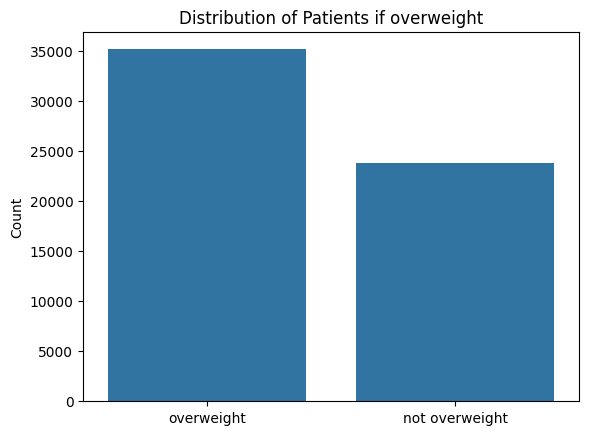

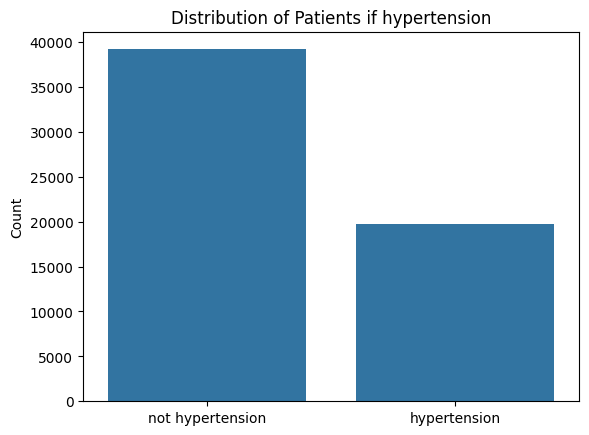

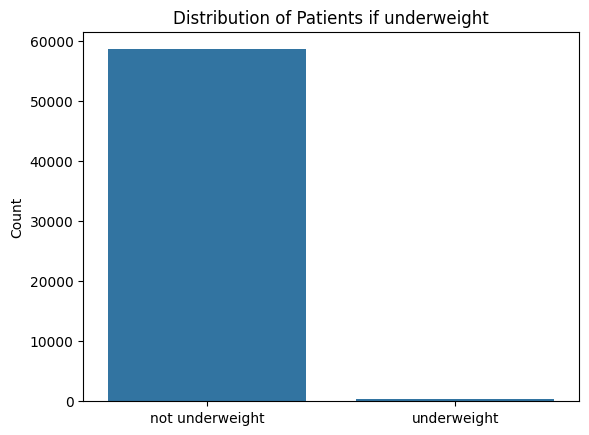

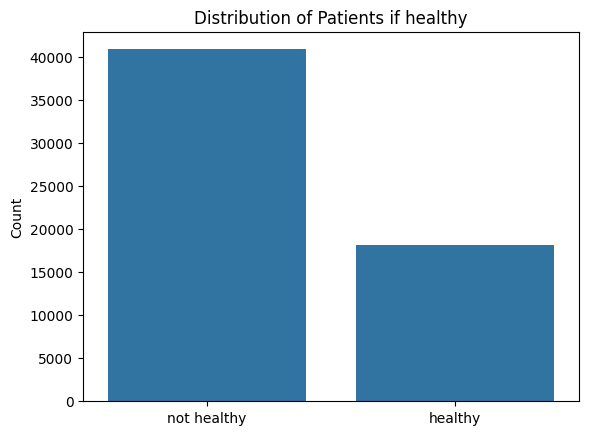

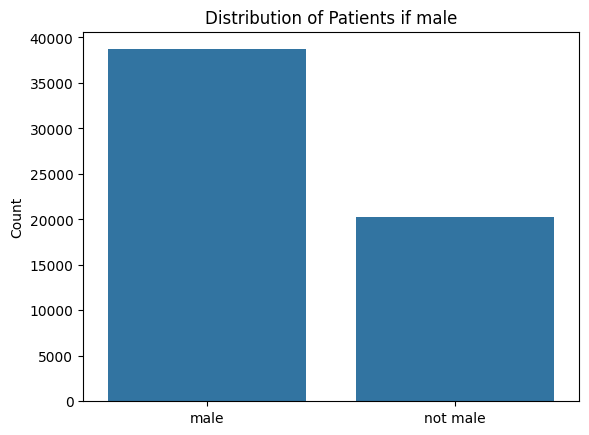

In [4]:
plot_patients_by_status(DATASET, overweight)
plot_patients_by_status(DATASET, hypertension)
plot_patients_by_status(DATASET, underweight)
plot_patients_by_status(DATASET, healthy)
plot_patients_by_status(DATASET, male)


### quick observations
- twice more males
- twice more unhealthies
- twice more not in hypertension
- a tad more overweights
- underweights unsignificant

In [5]:
def has_cardio(patient: Patient) -> Status:
    """Has a cardio disease"""
    return Status.VALID if patient.cardio else Status.INVALID

def smoke(patient: Patient) -> Status:
    """Check if a patient is smoking."""
    return Status.VALID if patient.smoke else Status.INVALID

def alcohol(patient: Patient) -> Status:
    """Check if a patient is drinking alcohol."""
    return Status.VALID if patient.alco else Status.INVALID

def active(patient: Patient) -> Status:
    """Check if a patient is active."""
    return Status.VALID if patient.active else Status.INVALID

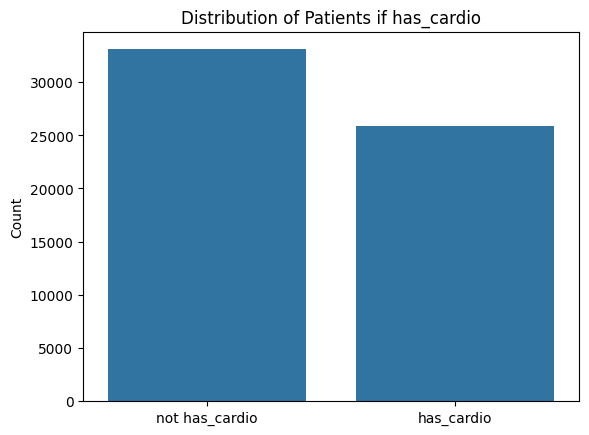

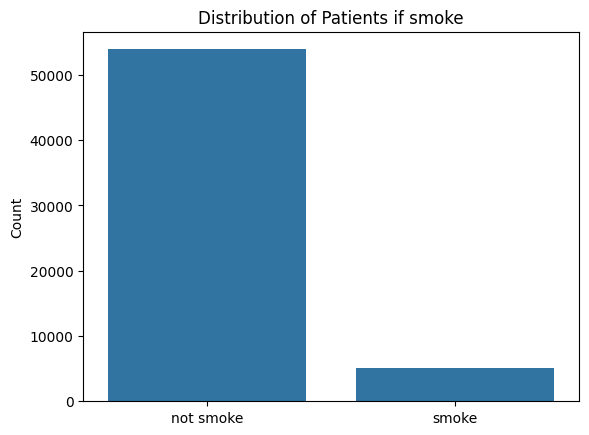

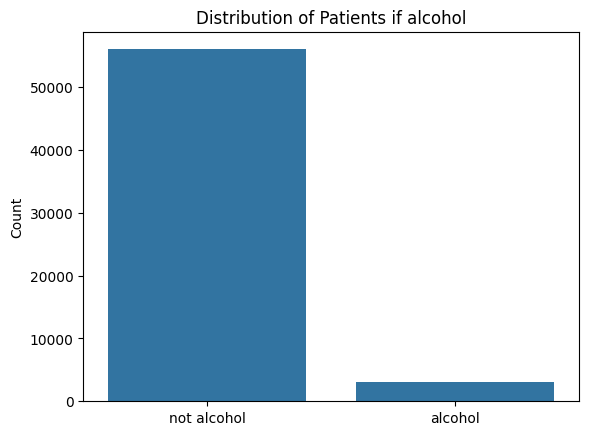

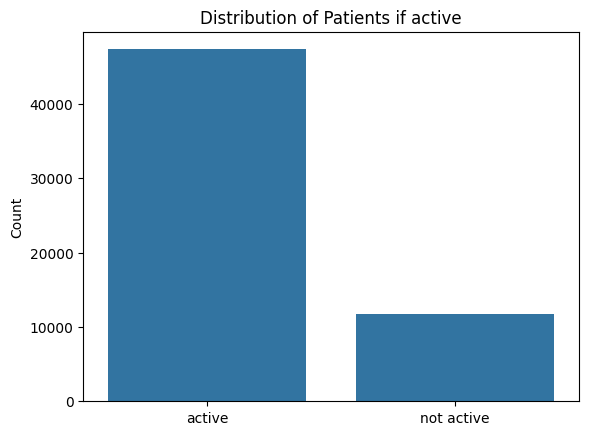

In [6]:
plot_patients_by_status(DATASET, has_cardio)
plot_patients_by_status(DATASET, smoke)
plot_patients_by_status(DATASET, alcohol)
plot_patients_by_status(DATASET, active)

In [7]:
from scripts.plots import create_all_patients


ALL_PATIENTS = create_all_patients(DATASET)

In [8]:
from typing import Dict, List

from scripts.bmi import AgeGroup, BmiLevel
from scripts.definitions import ApHighLevel, ApLowLevel

#Age group
#Broader Age group
#Bmi Status
#Ap Hi status
# Ap lo status

def count_by_bmi_category(patients: List[Patient]) -> tuple[Dict[BmiLevel, int],Dict[BmiLevel, int]]:
    """Count the number of patients in each BMI category."""
    counts = {level: 0 for level in BmiLevel}
    cardio_occurences = counts
    for patient in patients:
        counts[patient.bmi_status] += 1
        if patient.cardio:
            cardio_occurences[patient.bmi_status] += 1
    return counts, cardio_occurences

def count_by_age_group(patients: List[Patient]) -> tuple[Dict[AgeGroup, int],Dict[AgeGroup, int]]:
    """Count the number of patients in each age group."""
    counts = {group: 0 for group in AgeGroup}
    cardio_occurences = counts
    for patient in patients:
        counts[patient.broader_age_group] += 1
        if patient.cardio:
            cardio_occurences[patient.broader_age_group] += 1
    del counts[AgeGroup.KID]
    del counts[AgeGroup.SENIOR]
    del counts[AgeGroup.TEEN]
    del counts[AgeGroup.YOUNG_ADULT]
    del counts[AgeGroup.ADULT]
    del cardio_occurences[AgeGroup.KID]
    del cardio_occurences[AgeGroup.SENIOR]
    del cardio_occurences[AgeGroup.TEEN]
    del cardio_occurences[AgeGroup.YOUNG_ADULT]
    del cardio_occurences[AgeGroup.ADULT]
    return counts, cardio_occurences

def count_by_ap_hi_status(patients: List[Patient]) -> tuple[Dict[ApHighLevel, int],Dict[ApHighLevel, int]]:
    """Count the number of patients in each ap_hi status."""
    counts = {level: 0 for level in ApHighLevel}
    cardio_occurences = counts
    for patient in patients:
        counts[patient.ap_hi_status] += 1
        if patient.cardio:
            cardio_occurences[patient.ap_hi_status] += 1
    del counts[ApHighLevel.INVALID]
    del cardio_occurences[ApHighLevel.INVALID]
    return counts, cardio_occurences

def count_by_ap_lo_status(patients: List[Patient]) -> tuple[Dict[ApLowLevel, int],Dict[ApLowLevel, int]]:
    """Count the number of patients in each ap_lo status."""
    counts = {level: 0 for level in ApLowLevel}
    cardio_occurences = counts
    for patient in patients:
        counts[patient.ap_lo_status] += 1
        if patient.cardio:
            cardio_occurences[patient.ap_lo_status] += 1
    del counts[ApLowLevel.INVALID]
    del cardio_occurences[ApLowLevel.INVALID]
    return counts, cardio_occurences

def count_by_age_group_2(patients: List[Patient]) -> tuple[Dict[AgeGroup, int],Dict[AgeGroup, int]]:
    """Count the number of patients in each age group."""
    counts = {group: 0 for group in AgeGroup}
    cardio_occurences = counts
    for patient in patients:
        counts[patient.age_group] += 1
        if patient.cardio:
            cardio_occurences[patient.age_group] += 1
    del counts[AgeGroup.KID]
    del counts[AgeGroup.KIDS]
    del counts[AgeGroup.TEEN]
    del counts[AgeGroup.YOUNG_ADULT]
    del counts[AgeGroup.ADULTS]
    del cardio_occurences[AgeGroup.KID]
    del cardio_occurences[AgeGroup.KIDS]
    del cardio_occurences[AgeGroup.TEEN]
    del cardio_occurences[AgeGroup.YOUNG_ADULT]
    del cardio_occurences[AgeGroup.ADULTS]
    return counts, cardio_occurences


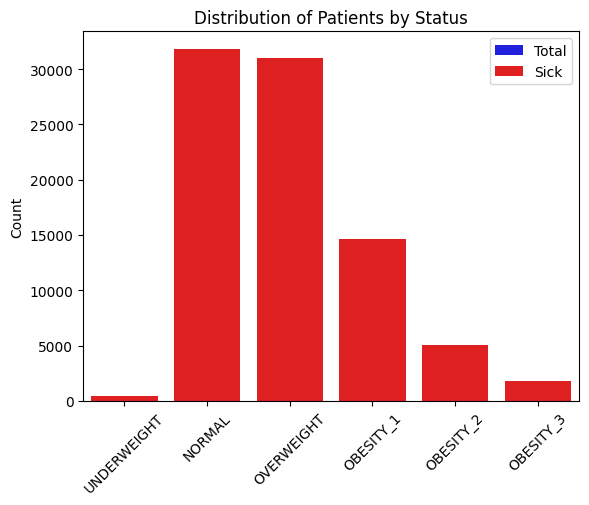

{<AgeGroup.KID: 1>: 0, <AgeGroup.TEEN: 2>: 0, <AgeGroup.KIDS: 3>: 0, <AgeGroup.YOUNG_ADULT: 4>: 0, <AgeGroup.ADULT: 5>: 0, <AgeGroup.SENIOR: 6>: 0, <AgeGroup.ADULTS: 7>: 84873}


KeyError: <AgeGroup.KID: 1>

In [9]:
# Plot those

from scripts.plots import plot_counts

plot_counts(count_by_bmi_category(ALL_PATIENTS))
plot_counts(count_by_age_group(ALL_PATIENTS))
plot_counts(count_by_ap_hi_status(ALL_PATIENTS))
plot_counts(count_by_ap_lo_status(ALL_PATIENTS))
plot_counts(count_by_age_group_2(ALL_PATIENTS))